

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Support Vector Classifier(SVC)**

**3. K nearest neighbors**


### Importing necessary libraries for visualization adn predictions

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

### Reading the dataset

In [13]:
data = pd.read_csv("dataset.csv")

### Let's check how the data is distributed

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## **Let's do some plotting to know how the data columns are distributed in the dataset**

### Pairplot using Seaborn for every feature

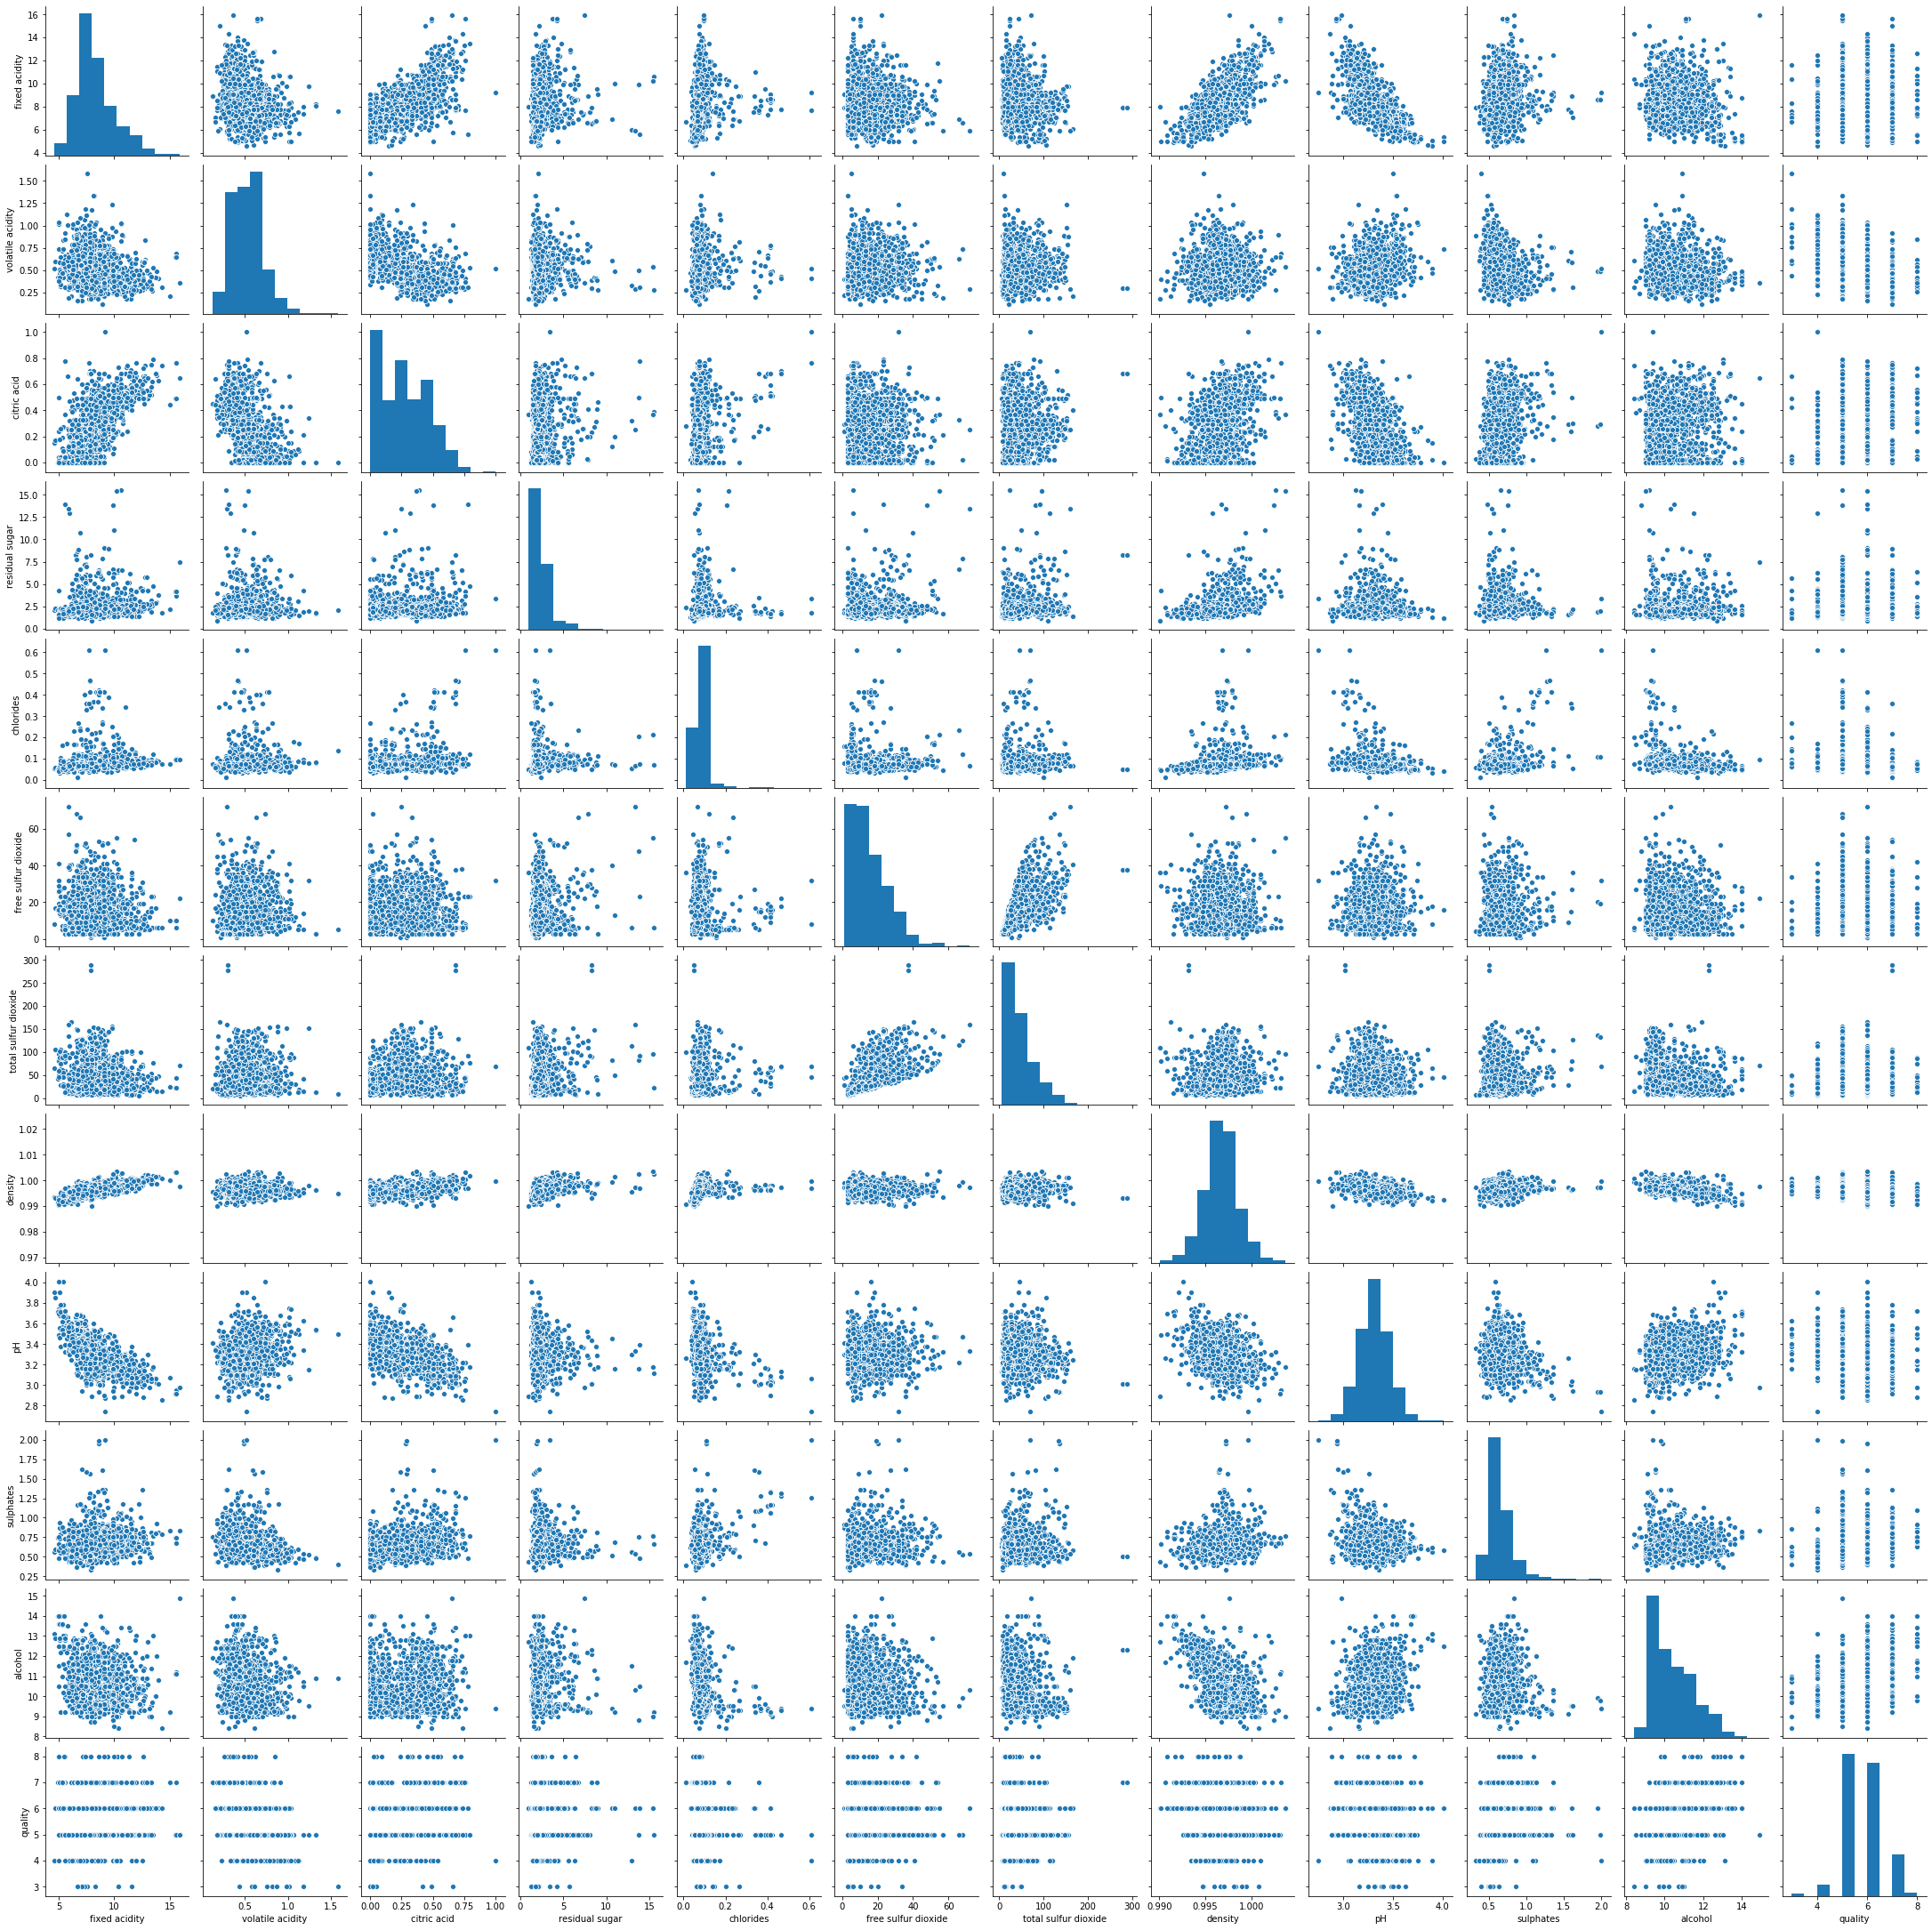

In [6]:
sns.pairplot(data , vars =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                          'pH', 'sulphates', 'alcohol', 'quality'])


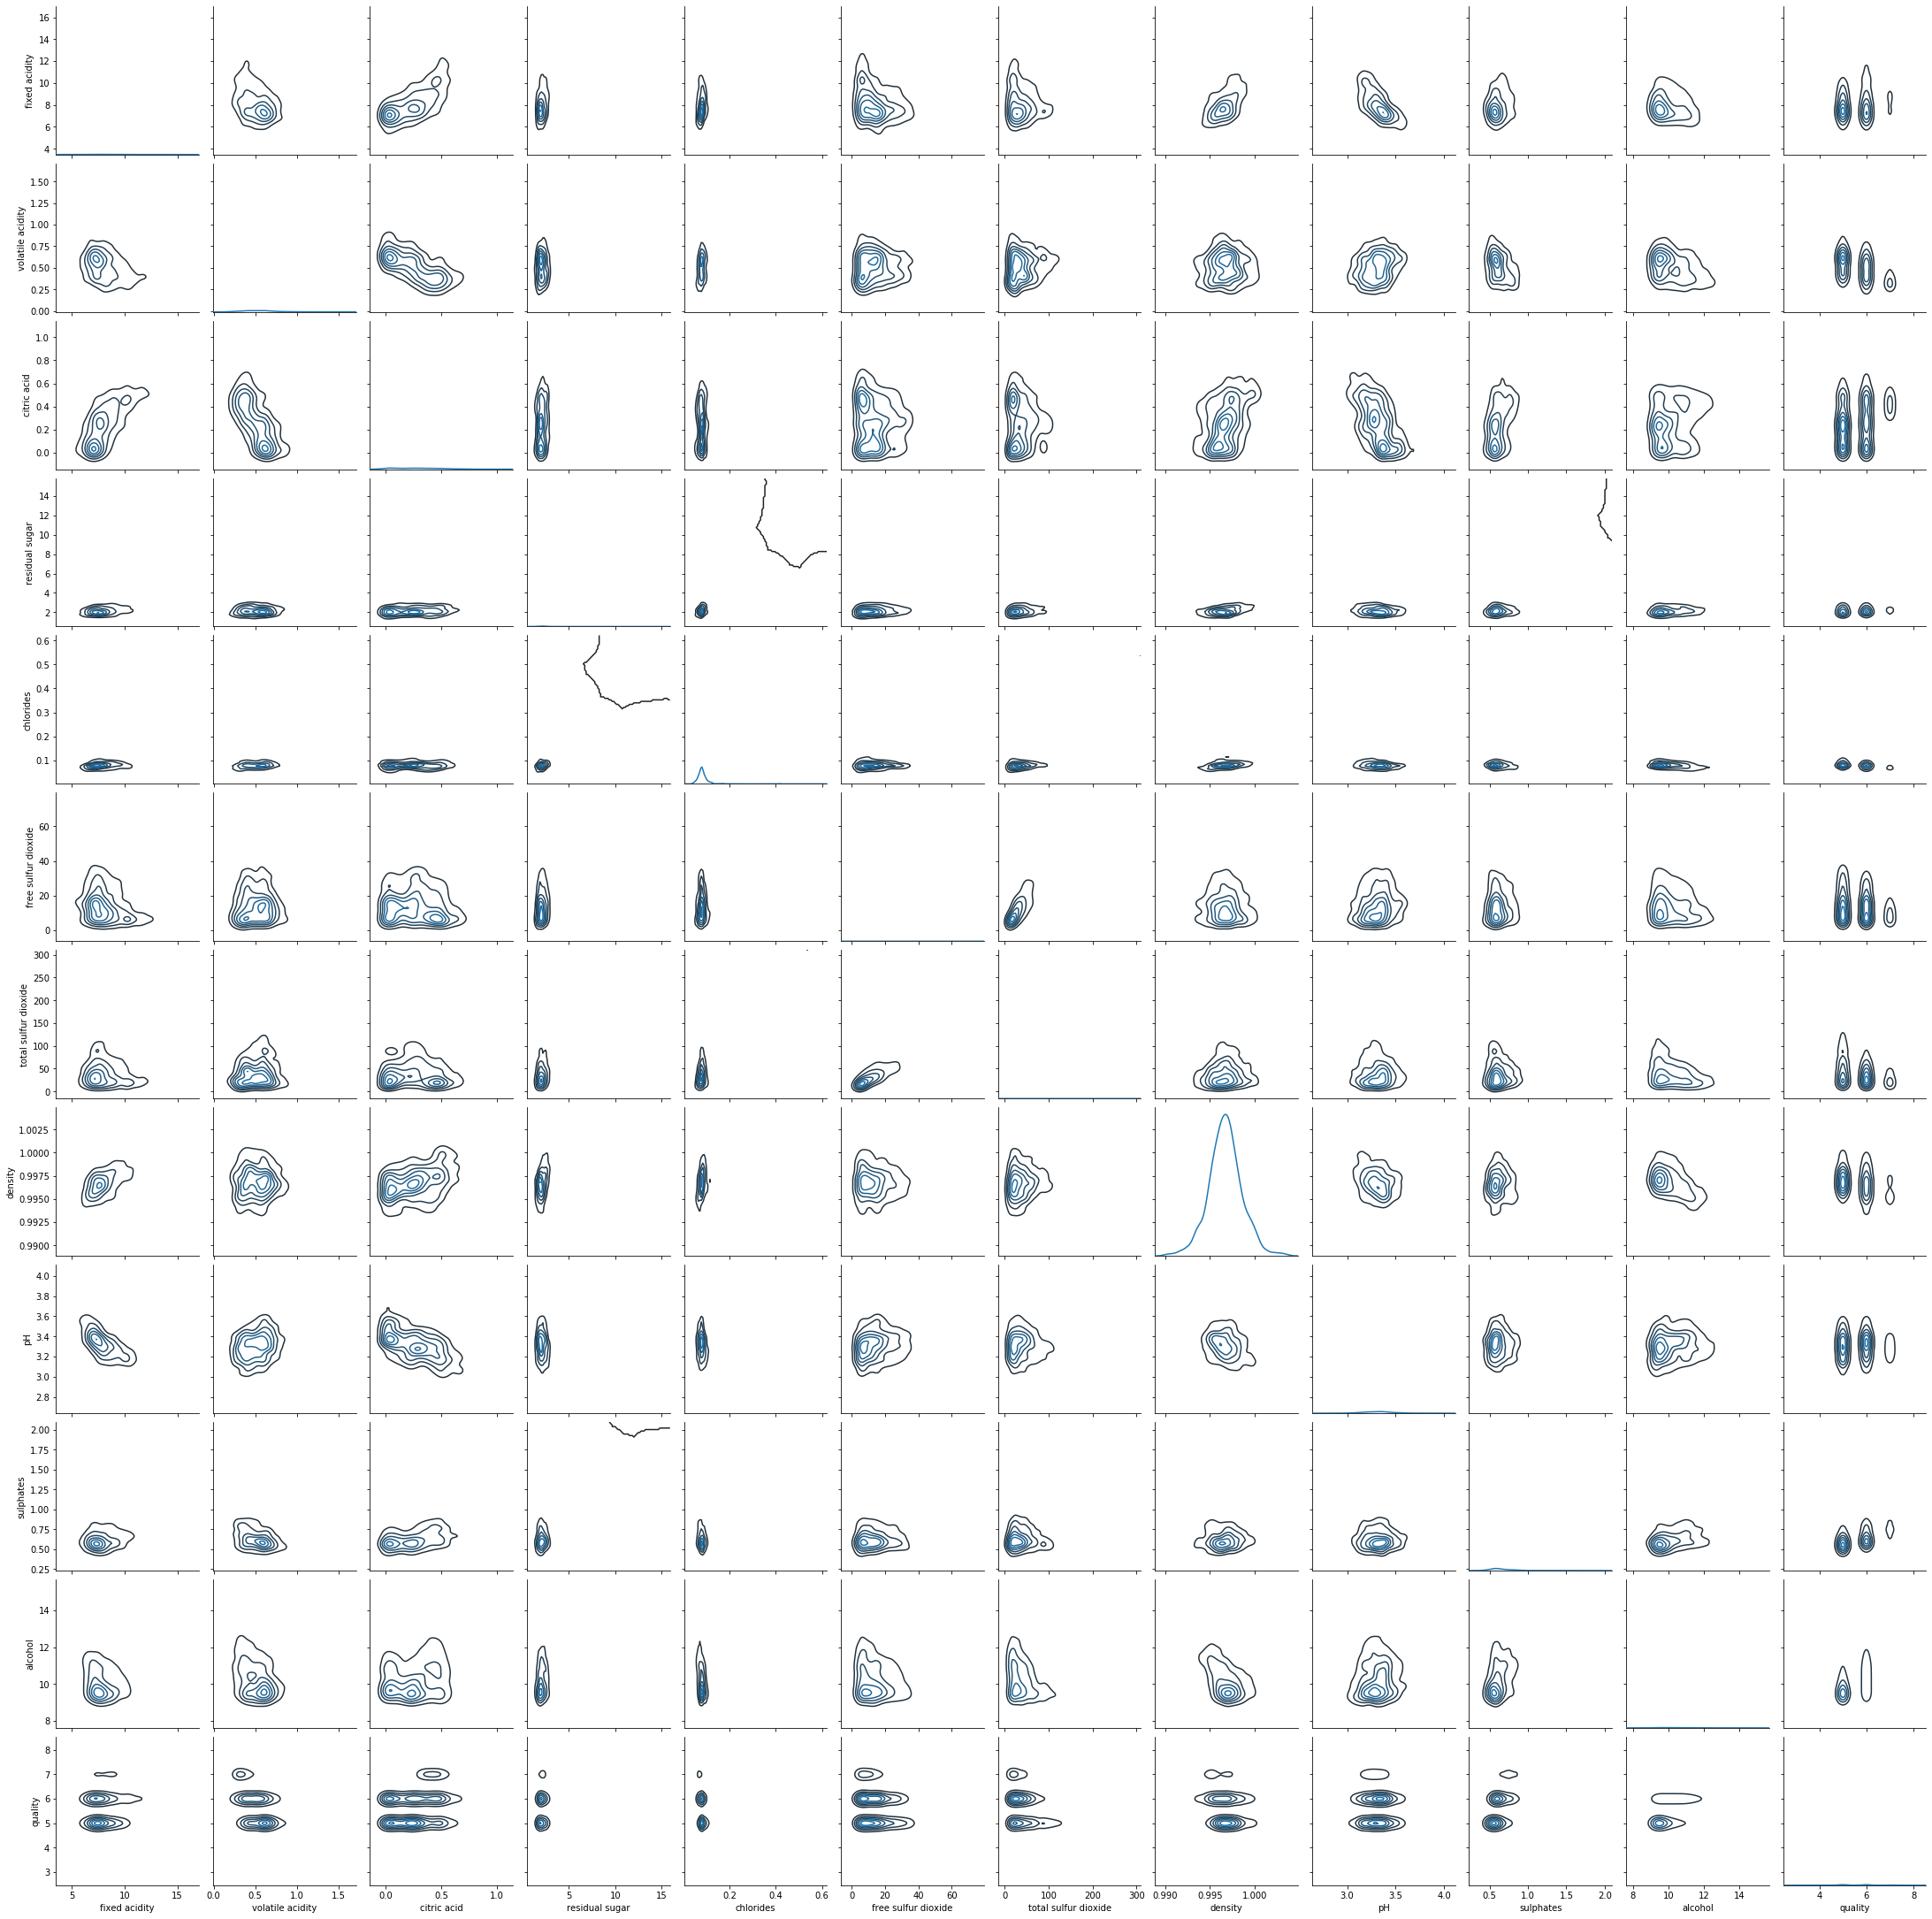

In [12]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

### Jointplot for all the parameters against quality parameter using Seaborn

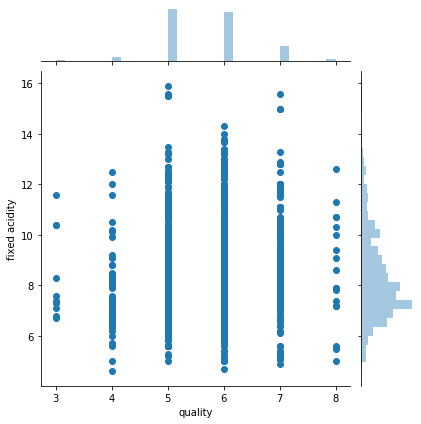

In [91]:
sns.jointplot(x="quality", y="fixed acidity", data=data);

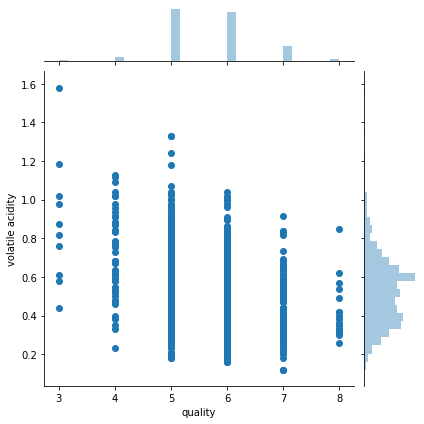

In [92]:
sns.jointplot(x="quality", y="volatile acidity", data=data);

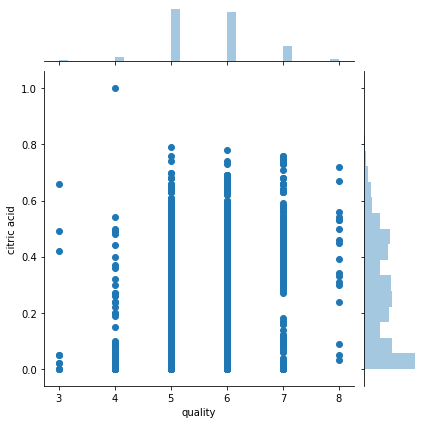

In [93]:
sns.jointplot(x="quality", y="citric acid", data=data);

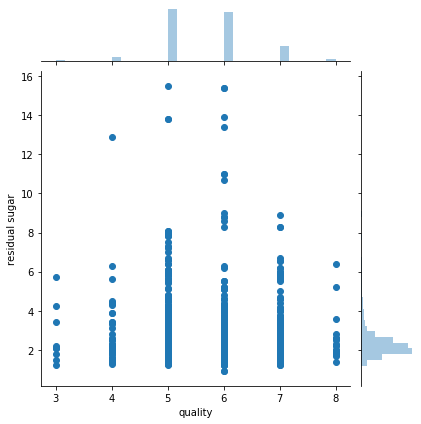

In [23]:
sns.jointplot(x="quality", y="residual sugar", data=data);

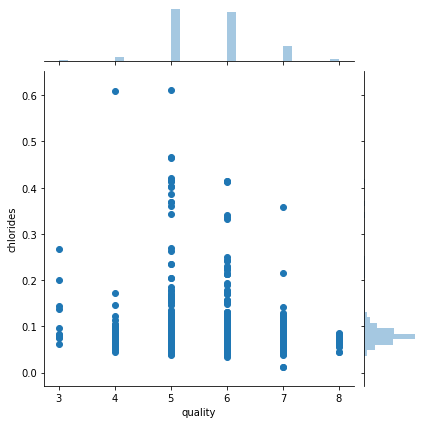

In [24]:
sns.jointplot(x="quality", y="chlorides", data=data);

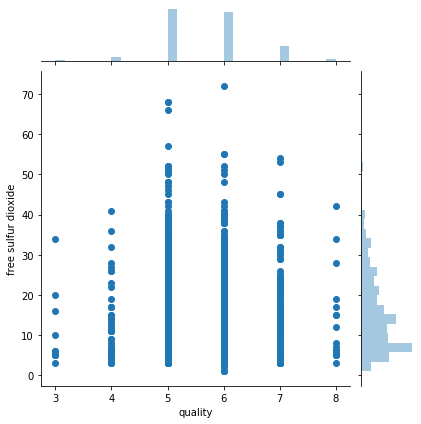

In [25]:
sns.jointplot(x="quality", y="free sulfur dioxide", data=data);

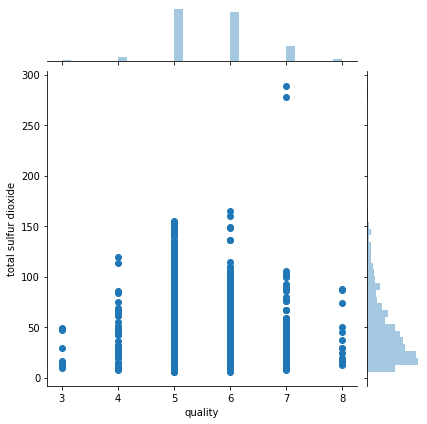

In [26]:
sns.jointplot(x="quality", y="total sulfur dioxide", data=data);

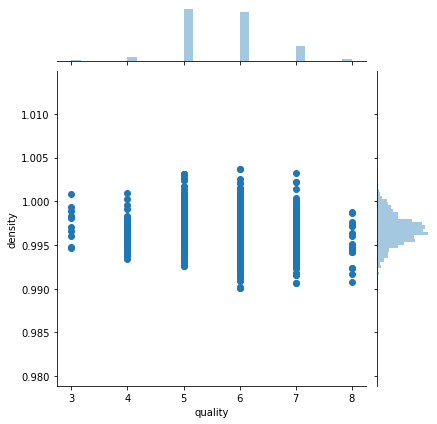

In [27]:
sns.jointplot(x="quality", y="density", data=data);

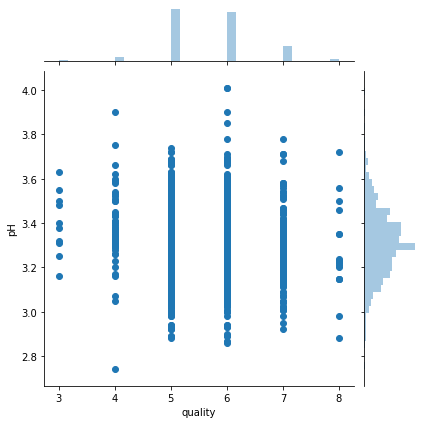

In [28]:
sns.jointplot(x="quality", y="pH", data=data);

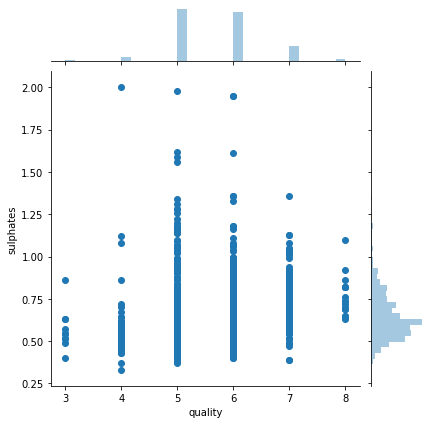

In [29]:
sns.jointplot(x="quality", y="sulphates", data=data);

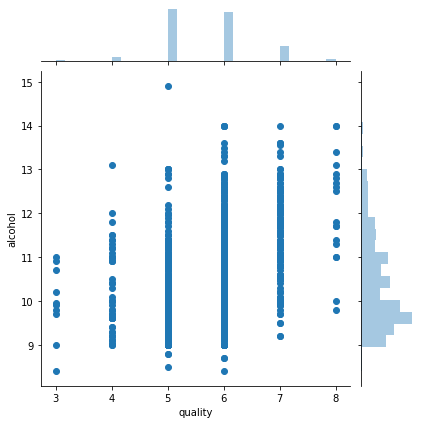

In [30]:
sns.jointplot(x="quality", y="alcohol", data=data);

### For better understanding using Catplot by Seaborn

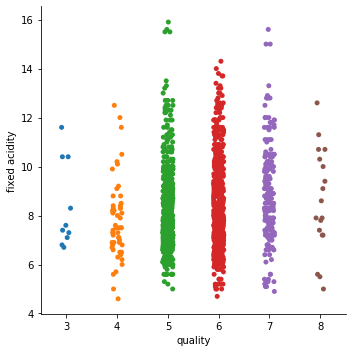

In [7]:
sns.catplot(x="quality", y="fixed acidity", data=data);

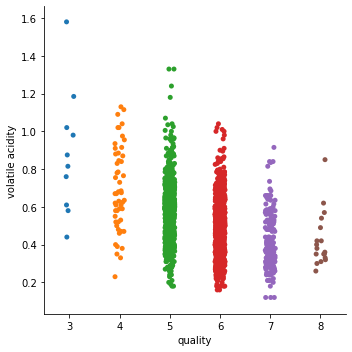

In [35]:
sns.catplot(x="quality", y="volatile acidity", data=data);

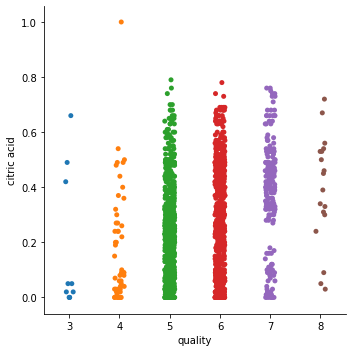

In [36]:
sns.catplot(x="quality", y="citric acid", data=data);

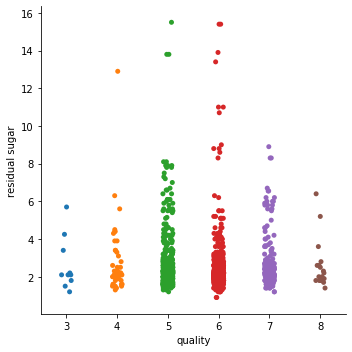

In [37]:
sns.catplot(x="quality", y="residual sugar", data=data);

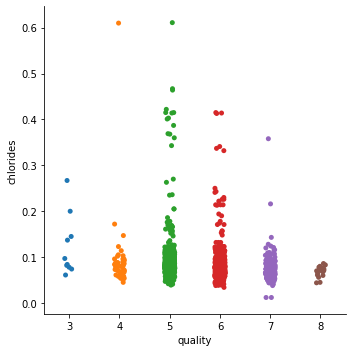

In [38]:
sns.catplot(x="quality", y="chlorides", data=data);

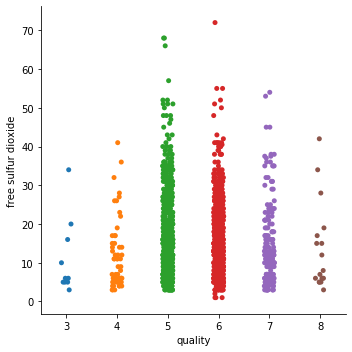

In [39]:
sns.catplot(x="quality", y="free sulfur dioxide", data=data);

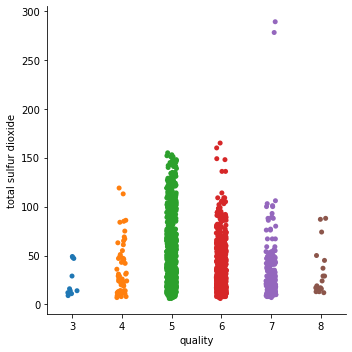

In [40]:
sns.catplot(x="quality", y="total sulfur dioxide", data=data);

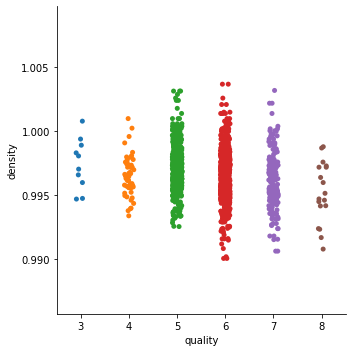

In [41]:
sns.catplot(x="quality", y="density", data=data);

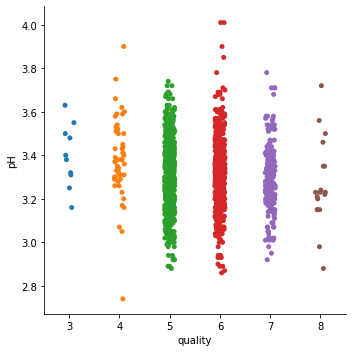

In [42]:
sns.catplot(x="quality", y="pH", data=data);

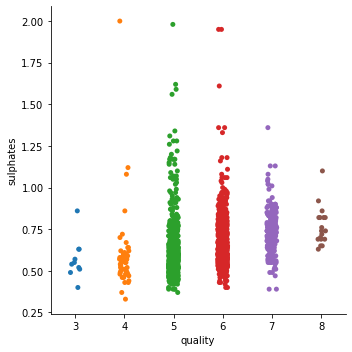

In [43]:
sns.catplot(x="quality", y="sulphates", data=data);

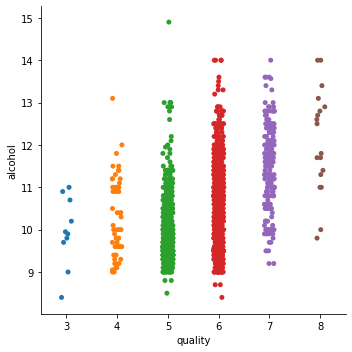

In [44]:
sns.catplot(x="quality", y="alcohol", data=data);

### Plotting the heatmap

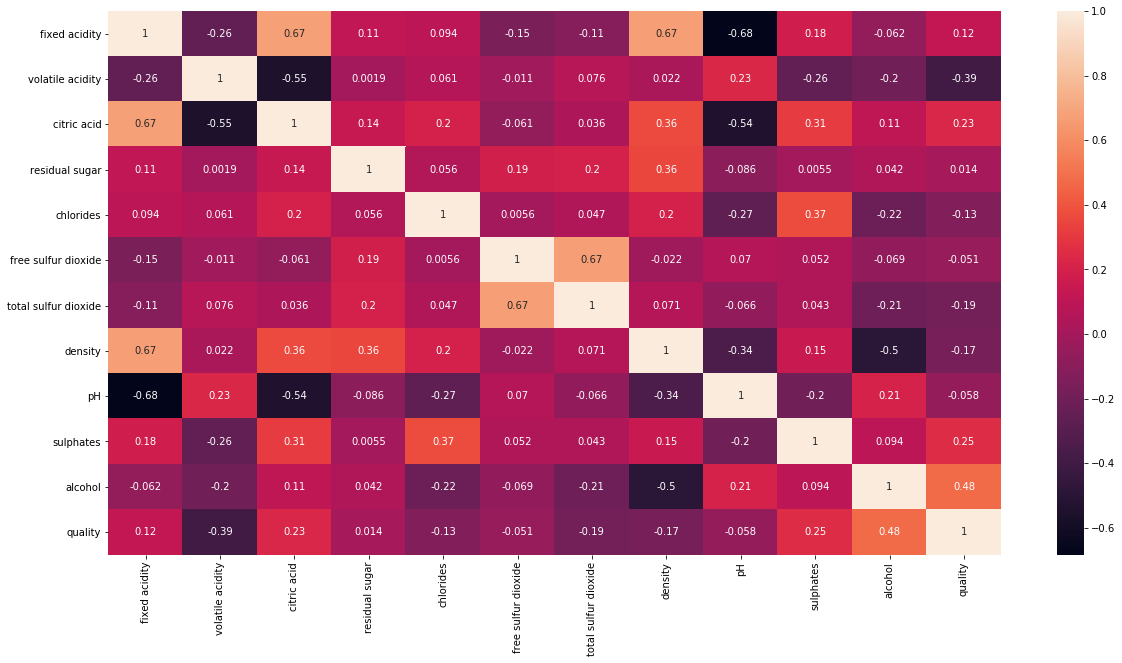

In [45]:
plt.figure(figsize =(20,10))
sns.heatmap(data.corr(), annot =True)

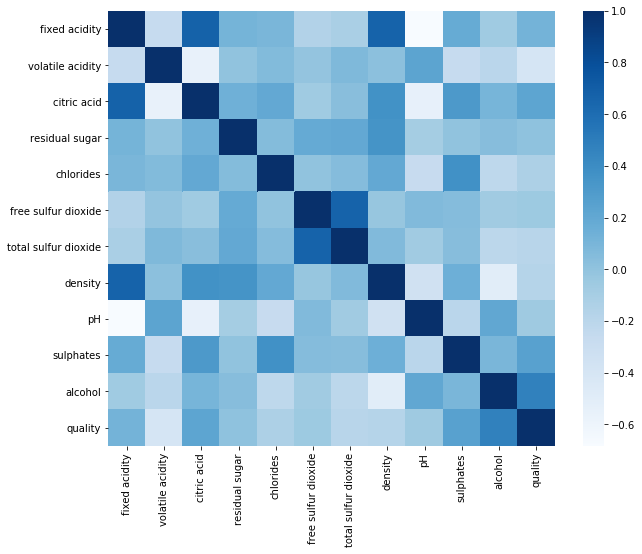

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues',annot=False)

## Checking for any missing variables
### If there is any they will appear on the purple base for some other colour.

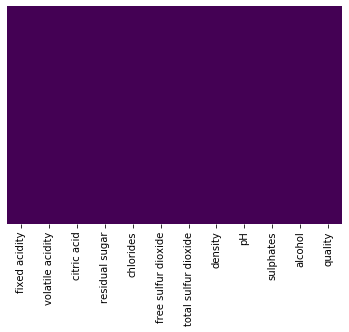

In [76]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Dividing the quality standards as Good, bad or medium for predictions

In [17]:
quality = data["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6.5:
        category.append("Good")
    else:
        category.append("Medium")

### Marking the new dataset with category column

In [18]:
category = pd.DataFrame(data=category, columns=["category"])
new_data = pd.concat([data,category],axis=1)
new_data.drop(columns="quality",axis=1,inplace=True)

### Visualizing the new dataset

In [19]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [20]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Visualizing the distribution among the different categories

Medium    1319
Good       217
Bad         63
Name: category, dtype: int64

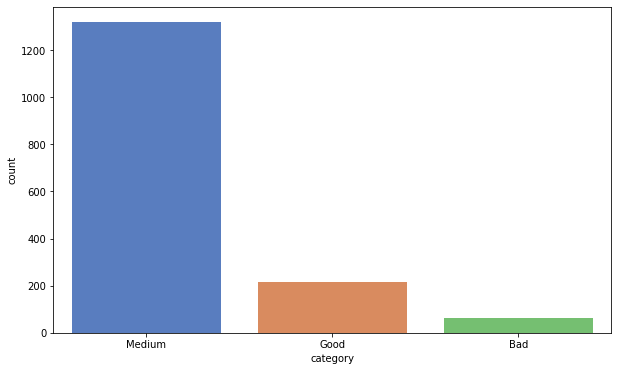

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(new_data["category"],palette="muted")
new_data["category"].value_counts()

<Figure size 864x432 with 0 Axes>

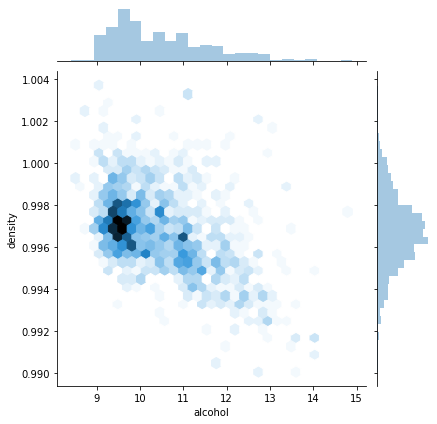

In [22]:
plt.figure(figsize=(12,6))
sns.jointplot(y=new_data["density"],x=new_data["alcohol"],kind="hex")

## Preprocessing Data for performing Machine learning algorithms

### Getting data ready for predicitons and training model

In [23]:
X = new_data.drop('category', axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
y = new_data['category']
y

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
1594    Medium
1595    Medium
1596    Medium
1597    Medium
1598    Medium
Name: category, Length: 1599, dtype: object

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2


In [27]:
y_test

803     Medium
124     Medium
350     Medium
682     Medium
1326    Medium
         ...  
1259    Medium
1295    Medium
1155    Medium
963     Medium
704        Bad
Name: category, Length: 320, dtype: object

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [32]:
y

array([2, 2, 2, ..., 2, 2, 2])

# Using Random Forest Classifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [34]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        11
        Good       0.73      0.51      0.60        47
      Medium       0.88      0.97      0.92       262

    accuracy                           0.87       320
   macro avg       0.54      0.49      0.51       320
weighted avg       0.83      0.87      0.84       320



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(confusion_matrix(y_test, pred_rfc))

[[  0   0  11]
 [  0  24  23]
 [  0   9 253]]


# Using SVM Model

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

## Evaluating the model

In [41]:
y_predict =svc.predict(X_test)

In [42]:
y_predict

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medi

In [43]:
cm = confusion_matrix(y_test,y_predict)

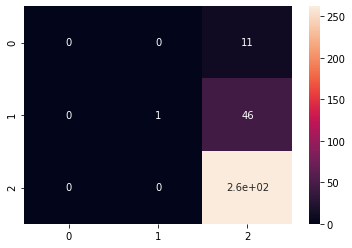

In [44]:
sns.heatmap(cm ,annot=True)

In [45]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        11
        Good       1.00      0.02      0.04        47
      Medium       0.82      1.00      0.90       262

    accuracy                           0.82       320
   macro avg       0.61      0.34      0.31       320
weighted avg       0.82      0.82      0.74       320



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import sklearn.metrics as metrics

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
y_predict =knn_model.predict(X_test)
y_predict

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Good', 'Medium',
       'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium'

In [60]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        11
        Good       0.46      0.26      0.33        47
      Medium       0.84      0.94      0.89       262

    accuracy                           0.81       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.76      0.81      0.78       320



## Improving KNN Model with a better value of K

In [61]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8125  , 0.771875, 0.79375 , 0.796875, 0.80625 , 0.821875,
       0.8     , 0.79375 , 0.796875])

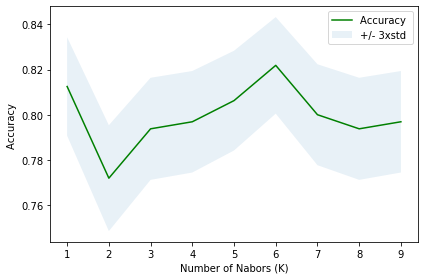

In [62]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [162]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.821875 with k= 6


In [164]:

k = 8

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8467552775605942
Test set Accuracy:  0.79375


In [166]:
knn_model = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [167]:
y_predict =knn_model.predict(X_test)
y_predict

array(['Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium',
       'Medium', 'Good', 'Medium', 'Medium', 'Good', 'Medium', 'Good',
       'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
  

In [168]:
cm = confusion_matrix(y_test,y_predict)

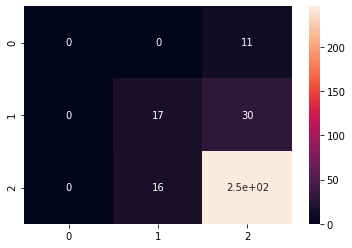

In [169]:
sns.heatmap(cm ,annot=True)

In [171]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8444096950742768
Test set Accuracy:  0.796875


In [172]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        11
        Good       0.52      0.36      0.43        47
      Medium       0.86      0.94      0.90       262

    accuracy                           0.82       320
   macro avg       0.46      0.43      0.44       320
weighted avg       0.78      0.82      0.80       320



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
